In [4]:
%matplotlib inline
import time
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
from scipy import io
import pickle

# Own code
sys.path.append("../")
from utils.data_utils import generate_dgp_tvp_var, generate_matrices, generate_contemp_matrices
from utils.tvp_models import TVPVARModel, tvp_ar_contemp, tvp_ar_non_contemp

# Suppress scientific notation in numpy
np.set_printoptions(suppress=True)

In [10]:
def simulation_run(run, M, prior):
    
    start_time = time.time()
    
    # Fixed for simulation
    T = 200
    p = 1
    train = 175
    sparsity = 0.40
    
    y = np.loadtxt(f'../simulations/datasets/y_{M}_{T}_{p}_{sparsity}_{run}_het_py.csv', delimiter=",")
    coefficients = np.loadtxt(f'../simulations/datasets/coefficients_{M}_{T}_{p}_{sparsity}_{run}_het_py.csv', delimiter=",")
    
    y_matrix_contemp, X_matrix_contemp = generate_contemp_matrices(T, M, p, y, constant=False)
    
    # Contemperanous values added 
    msfe_contemp, alpl_contemp, mt1t_full_contemp, mt1t_coeff_contemp, sigma_contemp, ar_model, *_ = tvp_ar_contemp(T, M, p, train, X_matrix_contemp, y_matrix_contemp, prior, print_status=False, iterations=100)
    msd_contemp = np.mean((mt1t_coeff_contemp - coefficients[:,1:train])**2)
    
    elapsed_time = time.time() - start_time
    
    print(f'Run: {run}, M: {M} & prior: {prior} -> MSD: {msd_contemp} | MSFE: {msfe_contemp.mean()} | ALPL: {alpl_contemp.mean()}')
    
    return [msfe_contemp, alpl_contemp, msd_contemp, M, prior, mt1t_coeff_contemp, coefficients[:,1:train]]

In [11]:
*_, estimated_coeff, true_coeff = simulation_run(1,3,"lasso_alternative")

Run: 1, M: 3 & prior: lasso_alternative -> MSD: 0.01794762095364222 | MSFE: 1.9543462071572133 | ALPL: -26.057170391289233


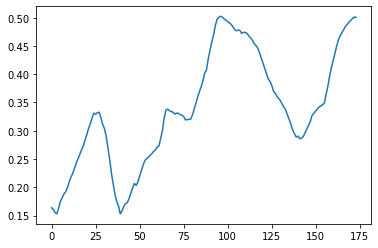

In [19]:
plt.plot(estimated_coeff.reshape(3,3,174)[0,0,:])

In [ ]:
%%time
import time
import os
from multiprocessing import Pool, Array

# They are going to be some disgusting warnings for the first iterations of the model (has to do with initialization)
import warnings
warnings.filterwarnings("ignore")

np.random.seed(12345)
n_iterations = 200

iterations_set = np.arange(1,n_iterations+1,1)
M = (3,7)
prior_list = ["svss"]#, "lasso_alternative", "horseshoe"]
args_tuples = [x for sub_list in [x for sub_list in [[[(n, m, prior) for n in iterations_set] for m in M] for prior in prior_list] for x in sub_list] for x in sub_list]

if __name__ == '__main__':
    
    pool = Pool()
    simulation_results = pool.starmap(simulation_run, args_tuples)

In [4]:
T = 200
train = 175
p = 1
sparsity = 0.40
prior = "svss"

simulation_parameters = [T,p,train, 1/3, 1/9, 4*1e-5, 1/6, 1/2, sparsity, 1e-2, 1e-9, 12345]

dump_to_disk = [simulation_results, simulation_parameters]

with open(f'../simulations/results/statistics_{T}_{p}_{n_iterations}_{prior}_{sparsity}.pkl', 'wb') as f:
        pickle.dump(dump_to_disk, f, pickle.HIGHEST_PROTOCOL)

T = 200, SPARSITY = 0.20

In [5]:
def simulation_run(run, M, prior):
    
    start_time = time.time()
    
    # Fixed for simulation|
    T = 200
    p = 1
    train = 175
    sparsity = 0.20
    
    y = np.loadtxt(f'../simulations/datasets/y_{M}_{T}_{p}_{sparsity}_{run}_het_py.csv', delimiter=",")
    coefficients = np.loadtxt(f'../simulations/datasets/coefficients_{M}_{T}_{p}_{sparsity}_{run}_het_py.csv', delimiter=",")
    
    y_matrix_contemp, X_matrix_contemp = generate_contemp_matrices(T, M, p, y)
    
    # Contemperanous values added 
    msfe_contemp, alpl_contemp, mt1t_full_contemp, mt1t_coeff_contemp, sigma_contemp, ar_model = tvp_ar_contemp(T, M, p, train, X_matrix_contemp, y_matrix_contemp, prior, print_status=False, iterations=100)
    msd_contemp = np.mean((mt1t_coeff_contemp - coefficients[:,1:train])**2)
    
    elapsed_time = time.time() - start_time
    
    print(f'Run: {run}, M: {M} & prior: {prior} -> MSD: {msd_contemp} | MSFE: {msfe_contemp.mean()} | ALPL: {alpl_contemp.mean()}')
    
    return [msfe_contemp, alpl_contemp, msd_contemp, M, prior]

In [6]:
%%time
import time
import os
from multiprocessing import Pool, Array

# They are going to be some disgusting warnings for the first iterations of the model (has to do with initialization)
import warnings
warnings.filterwarnings("ignore")

np.random.seed(12345)
n_iterations = 200

iterations_set = np.arange(1,n_iterations+1,1)
M = (3,7)
prior_list = ["svss"]#, "lasso_alternative", "horseshoe"]
args_tuples = [x for sub_list in [x for sub_list in [[[(n, m, prior) for n in iterations_set] for m in M] for prior in prior_list] for x in sub_list] for x in sub_list]

if __name__ == '__main__':
    
    pool = Pool()
    simulation_results = pool.starmap(simulation_run, args_tuples)

Run: 64, M: 3 & prior: svss -> MSD: 0.03751015067856057 | MSFE: 3.7631477610070316 | ALPL: -35.80701608783857
Run: 36, M: 3 & prior: svss -> MSD: 0.03905840950053226 | MSFE: 2.4548481366485655 | ALPL: -32.929808245395456
Run: 92, M: 3 & prior: svss -> MSD: 0.05397817616673085 | MSFE: 5.635965194597434 | ALPL: -35.46944343420202
Run: 50, M: 3 & prior: svss -> MSD: 0.029557694759821437 | MSFE: 3.212681177470585 | ALPL: -34.378054318762864
Run: 15, M: 3 & prior: svss -> MSD: 0.04839989900046498 | MSFE: 2.0364152785287892 | ALPL: -35.51792096040979
Run: 22, M: 3 & prior: svss -> MSD: 0.04560835226417274 | MSFE: 4.560694910168321 | ALPL: -35.601085162850374
Run: 71, M: 3 & prior: svss -> MSD: 0.041417812766495504 | MSFE: 1.1549347735183875 | ALPL: -35.81169457269063
Run: 29, M: 3 & prior: svss -> MSD: 0.047313893686131994 | MSFE: 1.3428245865373427 | ALPL: -35.34754990215913
Run: 78, M: 3 & prior: svss -> MSD: 0.01885796362556896 | MSFE: 2.3145397006736568 | ALPL: -35.37841407976404
Run: 57

In [7]:
T = 200
train = 175
p = 1
sparsity = 0.20
prior = "svss"

simulation_parameters = [T,p,train, 1/3, 1/9, 4*1e-5, 1/6, 1/2, sparsity, 1e-2, 1e-9, 12345]

dump_to_disk = [simulation_results, simulation_parameters]

with open(f'../simulations/results/statistics_{T}_{p}_{n_iterations}_{prior}_{sparsity}.pkl', 'wb') as f:
        pickle.dump(dump_to_disk, f, pickle.HIGHEST_PROTOCOL)

In [8]:
def simulation_run(run, M, prior):
    
    start_time = time.time()
    
    # Fixed for simulation
    T = 100
    p = 1
    train = 75
    sparsity = 0.40
    
    y = np.loadtxt(f'../simulations/datasets/y_{M}_{T}_{p}_{sparsity}_{run}_het_py.csv', delimiter=",")
    coefficients = np.loadtxt(f'../simulations/datasets/coefficients_{M}_{T}_{p}_{sparsity}_{run}_het_py.csv', delimiter=",")
    
    y_matrix_contemp, X_matrix_contemp = generate_contemp_matrices(T, M, p, y)
    
    # Contemperanous values added 
    msfe_contemp, alpl_contemp, mt1t_full_contemp, mt1t_coeff_contemp, sigma_contemp, ar_model = tvp_ar_contemp(T, M, p, train, X_matrix_contemp, y_matrix_contemp, prior, print_status=False, iterations=100)
    msd_contemp = np.mean((mt1t_coeff_contemp - coefficients[:,1:train])**2)
    
    elapsed_time = time.time() - start_time
    
    print(f'Run: {run}, M: {M} & prior: {prior} -> MSD: {msd_contemp} | MSFE: {msfe_contemp.mean()} | ALPL: {alpl_contemp.mean()}')
    
    return [msfe_contemp, alpl_contemp, msd_contemp, M, prior]

In [9]:
%%time
import time
import os
from multiprocessing import Pool, Array

# They are going to be some disgusting warnings for the first iterations of the model (has to do with initialization)
import warnings
warnings.filterwarnings("ignore")

np.random.seed(12345)
n_iterations = 200

iterations_set = np.arange(1,n_iterations+1,1)
M = (3,7)
prior_list = ["svss"]#, "lasso_alternative", "horseshoe"]
args_tuples = [x for sub_list in [x for sub_list in [[[(n, m, prior) for n in iterations_set] for m in M] for prior in prior_list] for x in sub_list] for x in sub_list]

if __name__ == '__main__':
    
    pool = Pool()
    simulation_results = pool.starmap(simulation_run, args_tuples)

Run: 106, M: 3 & prior: svss -> MSD: 0.015066407234190135 | MSFE: 2.56101512637414 | ALPL: -29.040924674480916
Run: 71, M: 3 & prior: svss -> MSD: 0.05819986789412503 | MSFE: 1.9675303146601033 | ALPL: -31.310043157527694
Run: 8, M: 3 & prior: svss -> MSD: 0.03448923754209744 | MSFE: 3.196766368150711 | ALPL: -30.065958273533845
Run: 92, M: 3 & prior: svss -> MSD: 0.04510560707474432 | MSFE: 1.2496967217945154 | ALPL: -33.980329061328504
Run: 29, M: 3 & prior: svss -> MSD: 0.04162964405905952 | MSFE: 0.740433926873918 | ALPL: -36.75855724767422
Run: 1, M: 3 & prior: svss -> MSD: 0.02969807688737528 | MSFE: 1.49439536623075 | ALPL: -36.27817879959383
Run: 36, M: 3 & prior: svss -> MSD: 0.028408450131534358 | MSFE: 1.2842825747163769 | ALPL: -33.11170076011307
Run: 57, M: 3 & prior: svss -> MSD: 0.04566217598736719 | MSFE: 1.6927028749787278 | ALPL: -34.33834834986294
Run: 64, M: 3 & prior: svss -> MSD: 0.031479113180277074 | MSFE: 1.953449418659756 | ALPL: -34.22507371181954
Run: 22, M:

In [10]:
T = 100
train = 75
p = 1
sparsity = 0.40
prior = "svss"

simulation_parameters = [T,p,train, 1/3, 1/9, 4*1e-5, 1/6, 1/2, sparsity, 1e-2, 1e-9, 12345]

dump_to_disk = [simulation_results, simulation_parameters]

with open(f'../simulations/results/statistics_{T}_{p}_{n_iterations}_{prior}_{sparsity}.pkl', 'wb') as f:
        pickle.dump(dump_to_disk, f, pickle.HIGHEST_PROTOCOL)

T = 100, SPARSITY = 0.20

In [11]:
def simulation_run(run, M, prior):
    
    start_time = time.time()
    
    # Fixed for simulation
    T = 100
    p = 1
    train = 75
    sparsity = 0.20
    
    y = np.loadtxt(f'../simulations/datasets/y_{M}_{T}_{p}_{sparsity}_{run}_het_py.csv', delimiter=",")
    coefficients = np.loadtxt(f'../simulations/datasets/coefficients_{M}_{T}_{p}_{sparsity}_{run}_het_py.csv', delimiter=",")
    
    y_matrix_contemp, X_matrix_contemp = generate_contemp_matrices(T, M, p, y)
    
    # Contemperanous values added 
    msfe_contemp, alpl_contemp, mt1t_full_contemp, mt1t_coeff_contemp, sigma_contemp, ar_model = tvp_ar_contemp(T, M, p, train, X_matrix_contemp, y_matrix_contemp, prior, print_status=False, iterations=100)
    msd_contemp = np.mean((mt1t_coeff_contemp - coefficients[:,1:train])**2)
    
    elapsed_time = time.time() - start_time
    
    print(f'Run: {run}, M: {M} & prior: {prior} -> MSD: {msd_contemp} | MSFE: {msfe_contemp.mean()} | ALPL: {alpl_contemp.mean()}')
    
    return [msfe_contemp, alpl_contemp, msd_contemp, M, prior]

In [12]:
%%time
import time
import os
from multiprocessing import Pool, Array

# They are going to be some disgusting warnings for the first iterations of the model (has to do with initialization)
import warnings
warnings.filterwarnings("ignore")

np.random.seed(12345)
n_iterations = 200

iterations_set = np.arange(1,n_iterations+1,1)
M = (3,7)
prior_list = ["svss"]#, "lasso_alternative", "horseshoe"]
args_tuples = [x for sub_list in [x for sub_list in [[[(n, m, prior) for n in iterations_set] for m in M] for prior in prior_list] for x in sub_list] for x in sub_list]

if __name__ == '__main__':
    
    pool = Pool()
    simulation_results = pool.starmap(simulation_run, args_tuples)

Run: 106, M: 3 & prior: svss -> MSD: 0.015066407234190135 | MSFE: 2.56101512637414 | ALPL: -29.040924674480916
Run: 22, M: 3 & prior: svss -> MSD: 0.06429889253522193 | MSFE: 6.046042665518261 | ALPL: -35.28497998203306
Run: 8, M: 3 & prior: svss -> MSD: 0.060868441497943605 | MSFE: 2.939614513199813 | ALPL: -33.982449129642
Run: 71, M: 3 & prior: svss -> MSD: 0.05819986789412503 | MSFE: 1.9675303146601033 | ALPL: -31.310043157527694
Run: 50, M: 3 & prior: svss -> MSD: 0.03378585614136177 | MSFE: 1.1507814789802262 | ALPL: -32.88221357464131
Run: 64, M: 3 & prior: svss -> MSD: 0.04444449952474075 | MSFE: 2.1781038856015575 | ALPL: -35.973334419742656
Run: 1, M: 3 & prior: svss -> MSD: 0.04508223330814321 | MSFE: 1.4749135598724652 | ALPL: -35.230028148527225
Run: 99, M: 3 & prior: svss -> MSD: 0.035604693467132756 | MSFE: 1.2173377297911667 | ALPL: -25.15958725617386
Run: 29, M: 3 & prior: svss -> MSD: 0.03871764319468311 | MSFE: 0.7213307248920646 | ALPL: -33.65245580883605
Run: 36, M

In [13]:
T = 100
train = 75
p = 1
sparsity = 0.20
prior = "svss"

simulation_parameters = [T,p,train, 1/3, 1/9, 4*1e-5, 1/6, 1/2, sparsity, 1e-2, 1e-9, 12345]

dump_to_disk = [simulation_results, simulation_parameters]

with open(f'../simulations/results/statistics_{T}_{p}_{n_iterations}_{prior}_{sparsity}.pkl', 'wb') as f:
        pickle.dump(dump_to_disk, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
optimal_set = []

for run in range(1,11):

    # Fixed for simulation
    T = 200
    p = 1
    train = 175
    prior_train = train-10
    sparsity = 0.05
    M = 2
    prior = "lasso_alternative"

    y = np.loadtxt(f'../simulations/datasets/y_{M}_{T}_{p}_{sparsity}_{run}_het_py.csv', delimiter=",")
    coefficients = np.loadtxt(f'../simulations/datasets/coefficients_{M}_{T}_{p}_{sparsity}_{run}_het_py.csv', delimiter=",")

    y_matrix_contemp, X_matrix_contemp = generate_contemp_matrices(T, M, p, y)

    prior_parameters = None

    a0_set = np.linspace(1,5,5)
    b0_set = np.hstack(([1], np.linspace(3,12,4)))
    tpl_list = [x for sub_list in [[(a,b) for a in a0_set] for b in b0_set] for x in sub_list]

    msfe_list = []

    for parameters in tpl_list:

        optim_pior_parameters = {'a0_lasso':parameters[0],'b0_lasso':parameters[1]}
        msfe_contemp, alpl_contemp, mt1t_full_contemp, mt1t_coeff_contemp, sigma_contemp, ar_model = tvp_ar_contemp(train, M, p, prior_train, X_matrix_contemp[:train], y_matrix_contemp[:,:train], prior, print_status=False, iterations=100, prior_parameters=optim_pior_parameters)

        msfe_list.append(msfe_contemp.mean())

    optimal_prior = tpl_list[msfe_list.index(min(msfe_list))]
    prior_parameters = {'a0_lasso':optimal_prior[0],'b0_lasso':optimal_prior[1]}

    print(f"Run: {run} -> Optimal prior: {optimal_prior}")
    optimal_set.append(optimal_prior)
    

In [ ]:
def simulation_run(run, M, prior):
    
    start_time = time.time()
    
    # Fixed for simulation
    T = 200
    p = 1
    train = 175
    prior_train = train-10
    sparsity = 0.05
    
    y = np.loadtxt(f'../simulations/datasets/y_{M}_{T}_{p}_{sparsity}_{run}_het_py.csv', delimiter=",")
    coefficients = np.loadtxt(f'../simulations/datasets/coefficients_{M}_{T}_{p}_{sparsity}_{run}_het_py.csv', delimiter=",")
    
    y_matrix_contemp, X_matrix_contemp = generate_contemp_matrices(T, M, p, y)
    
#     prior_parameters = None
    
#     if prior == 'lasso_alternative':
        
#         a0_set = np.linspace(1,5,5)
#         b0_set = np.hstack(([1], np.linspace(3,12,4)))
#         tpl_list = [x for sub_list in [[(a,b) for a in a0_set] for b in b0_set] for x in sub_list]
        
#         msfe_list = []
        
#         for parameters in tpl_list:
            
#             optim_pior_parameters = {'a0_lasso':parameters[0],'b0_lasso':parameters[1]}
#             msfe_contemp, alpl_contemp, mt1t_full_contemp, mt1t_coeff_contemp, sigma_contemp, ar_model = tvp_ar_contemp(train, M, p, prior_train, X_matrix_contemp[:train], y_matrix_contemp[:,:train], prior, print_status=False, iterations=100, prior_parameters=optim_pior_parameters)
            
#             msfe_list.append(msfe_contemp.mean())
        
#         optimal_prior = tpl_list[msfe_list.index(min(msfe_list))]
#         prior_parameters = {'a0_lasso':optimal_prior[0],'b0_lasso':optimal_prior[1]}
        
#     elif prior == 'svss':
        
#         g0_set = np.linspace(1,5,5)
#         h0_set = np.hstack(([1], np.linspace(3,12,4)))
#         tpl_list = [x for sub_list in [[(g,h) for g in g0_set] for h in h0_set] for x in sub_list]
        
#         msfe_list = []
        
#         for parameters in tpl_list:
            
#             optim_pior_parameters = {'g0':parameters[0],'h0':parameters[1], 'pi0': 0.5}
#             msfe_contemp, alpl_contemp, mt1t_full_contemp, mt1t_coeff_contemp, sigma_contemp, ar_model = tvp_ar_contemp(train, M, p, prior_train, X_matrix_contemp[:train], y_matrix_contemp[:,:train], prior, print_status=False, iterations=100, prior_parameters=optim_pior_parameters)
            
#             msfe_list.append(msfe_contemp.mean())
        
#         optimal_prior = tpl_list[msfe_list.index(min(msfe_list))]
#         prior_parameters = {'g0': optimal_prior[0], 'h0': optimal_prior[1], 'pi0': 0.5}
        
#     elif prior == 'horseshoe':
#         prior_parameters = {'a0': 1, 'b0': 1}
        
#         a0_set = np.hstack(([1.5], np.linspace(3,12,4)))
#         b0_set = np.hstack(([1.5],np.linspace(1,5,5)))
#         tpl_list = [x for sub_list in [[(a,b) for a in a0_set] for b in b0_set] for x in sub_list]
        
#         msfe_list = []
        
#         for parameters in tpl_list:
            
#             optim_pior_parameters = {'a0':parameters[0],'b0':parameters[1]}
#             msfe_contemp, alpl_contemp, mt1t_full_contemp, mt1t_coeff_contemp, sigma_contemp, ar_model = tvp_ar_contemp(train, M, p, prior_train, X_matrix_contemp[:train], y_matrix_contemp[:,:train], prior, print_status=False, iterations=100, prior_parameters=optim_pior_parameters)
            
#             msfe_list.append(msfe_contemp.mean())
        
#         optimal_prior = tpl_list[msfe_list.index(min(msfe_list))]
#         prior_parameters = {'a0':optimal_prior[0],'b0':optimal_prior[1]}
    
    # Contemperanous values added 
    msfe_contemp, alpl_contemp, mt1t_full_contemp, mt1t_coeff_contemp, sigma_contemp, ar_model = tvp_ar_contemp(T, M, p, train, X_matrix_contemp, y_matrix_contemp, prior, print_status=False, iterations=100)
    msd_contemp = np.mean((mt1t_coeff_contemp - coefficients[:,1:train])**2)
    
    elapsed_time = time.time() - start_time
    
    print(f'Run: {run}, M: {M} & prior: {prior} -> MSD: {msd_contemp} | MSFE: {msfe_contemp.mean()} | ALPL: {alpl_contemp.mean()}')
    
    return [msfe_contemp, alpl_contemp, msd_contemp, M, prior]